*IMPORTS REQUIRED TO RUN*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chi2_contingency


In [2]:
# Installation of LFS proceeded to make the download of all data instead of just the pointer
train_data = pd.read_csv("../data/train_data.csv", low_memory=False)
test_data = pd.read_csv("../data/test_data.csv")


In [3]:
train_data.head(2)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0


In [4]:
test_data.head(2)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
0,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,...,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1
1,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,...,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1


In [5]:
# Drop columns that are not present in the test dataset
train_data.drop(columns=["WCB Decision", "Agreement Reached"], inplace=True)

In [6]:
#Print the number of null values
train_data.isnull().sum()

Accident Date                          23134
Age at Injury                          19445
Alternative Dispute Resolution         19445
Assembly Date                              0
Attorney/Representative                19445
Average Weekly Wage                    48096
Birth Year                             48523
C-2 Date                               34005
C-3 Date                              406226
Carrier Name                           19445
Carrier Type                           19445
Claim Identifier                           0
Claim Injury Type                      19445
County of Injury                       19445
COVID-19 Indicator                     19445
District Name                          19445
First Hearing Date                    442673
Gender                                 19445
IME-4 Count                           460668
Industry Code                          29403
Industry Code Description              29403
Medical Fee Region                     19445
OIICS Natu

# <B>VINI - Individual Feature Analysis
- `Carier Type` Type of primary insurance provider responsible for providing workers' compensation coverage. 
- `Carier Name` Name of primary insurance provider responsible for providing workers' compensation coverage to the injured worker's employer.
- `Age at Injury` - Age of injured worker when the injury occurred.                                               
- `Birth Year` - The reported year of birth of the injured worker.                                           
- `Alternative Dispute Resolution` - Adjudication processes external to the Board.                                          


In [7]:
# To have an easier visualization of the 5 specific features of train dataset
train_data[['Carrier Type', 'Carrier Name', 'Age at Injury', 'Birth Year', 'Alternative Dispute Resolution']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 5 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Carrier Type                    574026 non-null  object 
 1   Carrier Name                    574026 non-null  object 
 2   Age at Injury                   574026 non-null  float64
 3   Birth Year                      544948 non-null  float64
 4   Alternative Dispute Resolution  574026 non-null  object 
dtypes: float64(2), object(3)
memory usage: 22.6+ MB


In [8]:
# To have an easier visualization of the 5 specific features of test
test_data[['Carrier Type', 'Carrier Name', 'Age at Injury', 'Birth Year', 'Alternative Dispute Resolution']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387975 entries, 0 to 387974
Data columns (total 5 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Carrier Type                    387975 non-null  object 
 1   Carrier Name                    387975 non-null  object 
 2   Age at Injury                   387975 non-null  int64  
 3   Birth Year                      368505 non-null  float64
 4   Alternative Dispute Resolution  387975 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 14.8+ MB


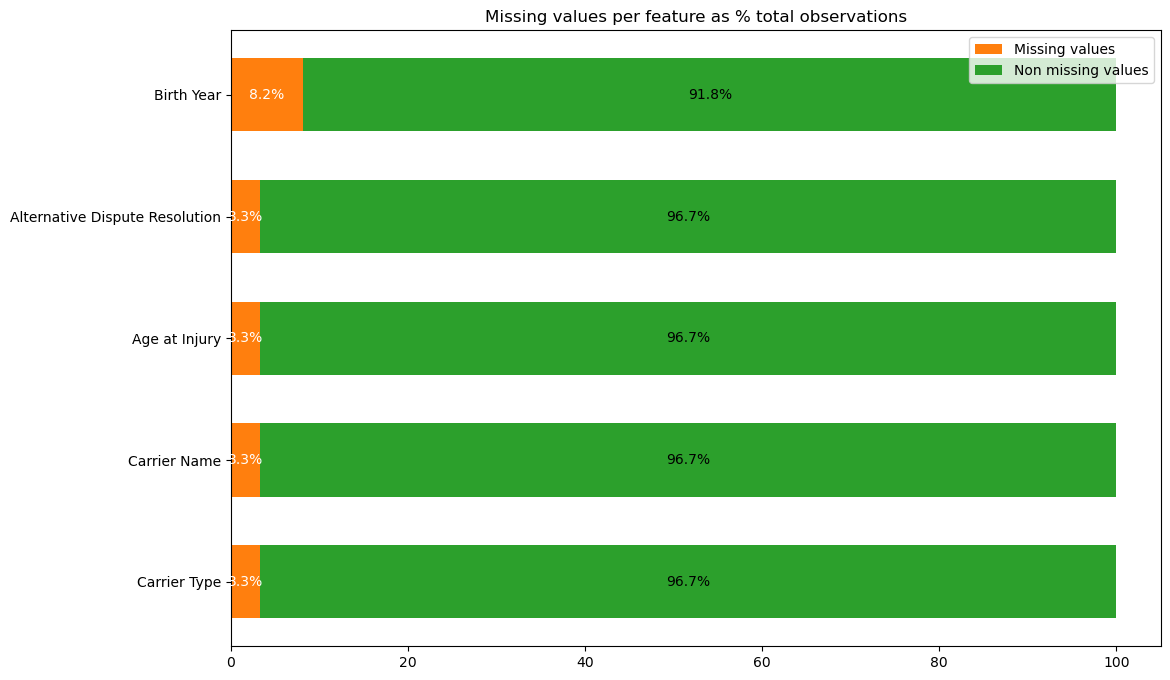

In [9]:
# Calculating the percentage of Nulls for this 5 features
number_obs = train_data[['Carrier Type', 'Carrier Name', 'Age at Injury', 'Birth Year', 'Alternative Dispute Resolution']].shape[0]
percentage_missing = round((train_data[['Carrier Type', 'Carrier Name', 'Age at Injury', 'Birth Year', 'Alternative Dispute Resolution']].isnull().sum() / number_obs)*100,1)
percentage_missing.sort_values(ascending=True, inplace= True)

percentage_missing_df = pd.DataFrame({"missing_values_(%)": percentage_missing})
percentage_missing_df["present_values_(%)"] = abs(percentage_missing_df["missing_values_(%)"] - 100)
percentage_present = percentage_missing_df["present_values_(%)"]
column_names = list(percentage_missing.index)

fig,ax = plt.subplots (figsize = (12,8))
p1 = ax.barh(y=column_names, width=percentage_missing, height= 0.6, color="tab:orange", label="Missing values")
p2 = ax.barh(y=column_names, width=percentage_present, height= 0.6, color="tab:green", left=percentage_missing, label= "Non missing values")
ax.bar_label(p1, labels= [str(element) + "%" for element in percentage_missing], color="white", label_type="center")
ax.bar_label(p2, labels= [str(element) + "%" for element in percentage_present], color="black", label_type="center")
ax.legend()
ax.set_title("Missing values per feature as % total observations")
plt.show()

- #### Its important to remember that we have ages of 0 in the Age of injury field, so we have also other potential NULL values.

# <b> Carier Type Feature

In [10]:
# General Info about the feature
train_data[['Carrier Type']].info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Carrier Type  574026 non-null  object
dtypes: object(1)
memory usage: 4.5+ MB


In [11]:
# Unique Values for Carrier Type
train_data['Carrier Type'].unique()
#8 Unique values

array(['1A. PRIVATE', nan, '2A. SIF', '4A. SELF PRIVATE',
       '3A. SELF PUBLIC', 'UNKNOWN', '5D. SPECIAL FUND - UNKNOWN',
       '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)',
       '5C. SPECIAL FUND - POI CARRIER WCB MENANDS'], dtype=object)

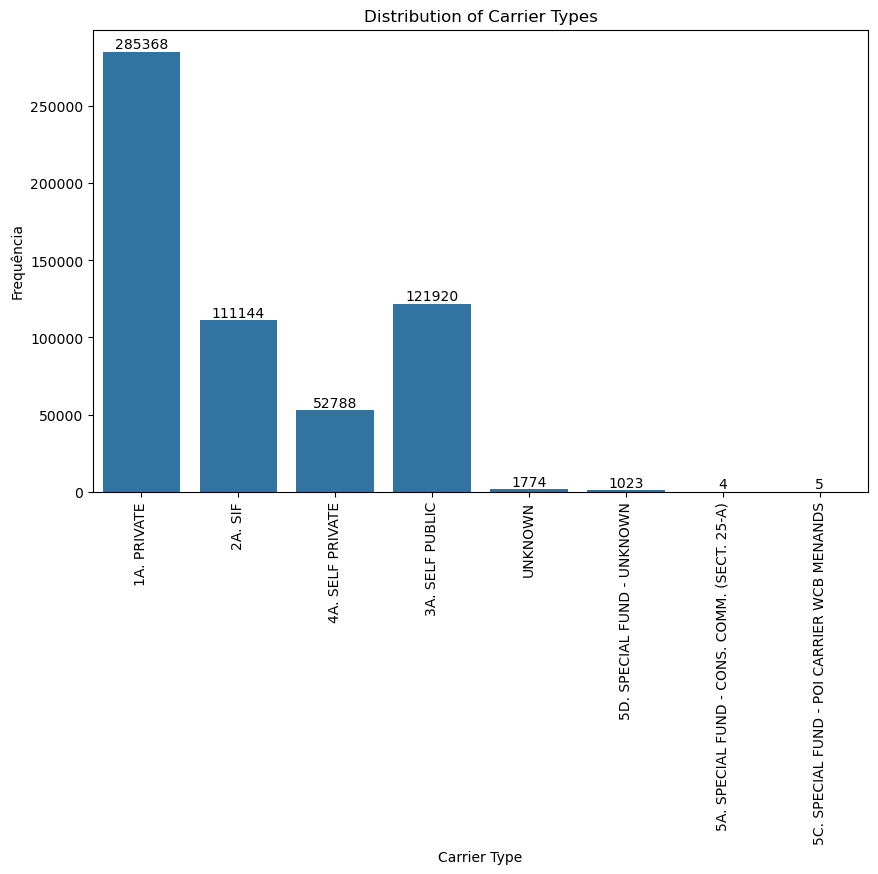

In [12]:
plt.figure(figsize=(10, 6))
carrier_bar_chart = sns.countplot(x='Carrier Type', data=train_data)
# Add the values on the top of the bars
for p in carrier_bar_chart.patches:
    carrier_bar_chart.text(p.get_x() + p.get_width() / 2., 
                            p.get_height(), 
                            int(p.get_height()), 
                            ha='center', va='bottom')
    
plt.title('Distribuição dos Tipos de Carrier')
plt.title('Distribution of Carrier Types')
plt.xlabel('Carrier Type')
plt.ylabel('Frequência')
plt.xticks(rotation=90)
plt.show()

### 5A and 5C are really "rare", with only few occurences. We will now calculate the percentage that each carier type represents

In [13]:
# Count occurences of each case 
carrier_counts = train_data['Carrier Type'].value_counts()
# Get the count of 5B
count_1A = carrier_counts.get('1A. PRIVATE', 0)  # Deountfault to 0 if '5B' does not exist
count_2A = carrier_counts.get('2A. SIF', 0)  # Deountfault to 0 if '5B' does not exist
count_3A = carrier_counts.get('3A. SELF PUBLIC', 0)  # Deountfault to 0 if '5B' does not exist
count_4A = carrier_counts.get('4A. SELF PRIVATE', 0)  # Deountfault to 0 if '5B' does not exist
count_5A = carrier_counts.get('5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)', 0)  # Deountfault to 0 if '5B' does not exist
count_5C = carrier_counts.get('5C. SPECIAL FUND - POI CARRIER WCB MENANDS', 0)  # Deountfault to 0 if '5B' does not exist
count_5D = carrier_counts.get('5D. SPECIAL FUND - UNKNOWN', 0)  # Deountfault to 0 if '5B' does not exist
count_Unknown = carrier_counts.get('UNKNOWN', 0)  # Deountfault to 0 if '5B' does not exist
#Calculate the total number of carrier
total_count = carrier_counts.sum()
# Calculate percentages for each carrier type
percentage_1A = (count_1A / total_count) * 100 if total_count > 0 else 0
percentage_2A = (count_2A / total_count) * 100 if total_count > 0 else 0
percentage_3A = (count_3A / total_count) * 100 if total_count > 0 else 0
percentage_4A = (count_4A / total_count) * 100 if total_count > 0 else 0
percentage_5A = (count_5A / total_count) * 100 if total_count > 0 else 0
percentage_5C = (count_5C / total_count) * 100 if total_count > 0 else 0
percentage_5D = (count_5D / total_count) * 100 if total_count > 0 else 0
percentage_Unknown = (count_Unknown / total_count) * 100 if total_count > 0 else 0

# Formatted print of the percentages
print("Percentage of Carrier Types:")
print(f"1A. PRIVATE: {percentage_1A:.3f}%")
print(f"2A. SIF: {percentage_2A:.3f}%")
print(f"3A. SELF PUBLIC: {percentage_3A:.3f}%")
print(f"4A. SELF PRIVATE: {percentage_4A:.3f}%")
print(f"5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A): {percentage_5A:.5f}%")
print(f"5C. SPECIAL FUND - POI CARRIER WCB MENANDS: {percentage_5C:.5f}%")
print(f"5D. SPECIAL FUND - UNKNOWN: {percentage_5D:.3f}%")
print(f"UNKNOWN: {percentage_Unknown:.3f}%")

#print(f"Percentage of 5A: {percentage_5A:.2f}%")
#print(f"Percentage of 5B: {percentage_5C:.2f}%")



Percentage of Carrier Types:
1A. PRIVATE: 49.713%
2A. SIF: 19.362%
3A. SELF PUBLIC: 21.239%
4A. SELF PRIVATE: 9.196%
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A): 0.00070%
5C. SPECIAL FUND - POI CARRIER WCB MENANDS: 0.00087%
5D. SPECIAL FUND - UNKNOWN: 0.178%
UNKNOWN: 0.309%


` Due to the very lo occurences of 5a and 5c we can consider than outliers `
### What we are going to do with them? 
- Exclude from some analysis with simplification purposes
- Investigate reasons for their low occurences
- Other?


### <b>Null Values comparison

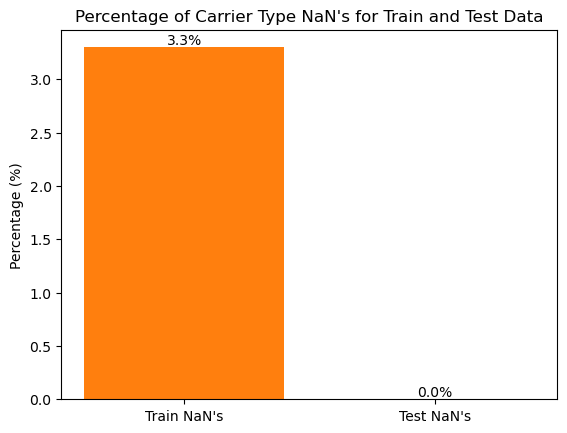

In [14]:
# Example to calculate NaN counts
train_carrier_na = train_data["Carrier Type"].isnull().sum()
test_carrier_na = test_data["Carrier Type"].isnull().sum()

# Total values
total_values_train = len(train_data["Carrier Type"])
total_values_test = len(test_data["Carrier Type"])

# Plotting
fig, ax = plt.subplots()
x_values = ["Train NaN's", "Test NaN's"]
bar_colours = ["tab:orange", "tab:blue"]

y_values = [
    round((train_carrier_na / total_values_train) * 100, 1),
    round((test_carrier_na / total_values_test) * 100, 1)
]

p = ax.bar(x_values, y_values, color=bar_colours)
ax.bar_label(p, labels=[str(element) + "%" for element in y_values])
ax.set_title("Percentage of Carrier Type NaN's for Train and Test Data")
ax.set_ylabel("Percentage (%)")

plt.show()

###  ` <b> Important note - Since Unknown is a value assigned when the carier type was not provide or could not be determined in the data collection, it would be reasonable to treat as equivalent to NaN. The low occurence of Unknown(0.309%) also supports that it don't have informative value. `
-- Drop NaN values?

# <b> *Carier Name Feature*

In [15]:
# General Info about the feature
train_data[['Carrier Name']].info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Carrier Name  574026 non-null  object
dtypes: object(1)
memory usage: 4.5+ MB


In [16]:
train_data['Carrier Name'].nunique()
# Here we can see that we have a really large number of unique values. 
# Drop, or try to extract some info from names

2046

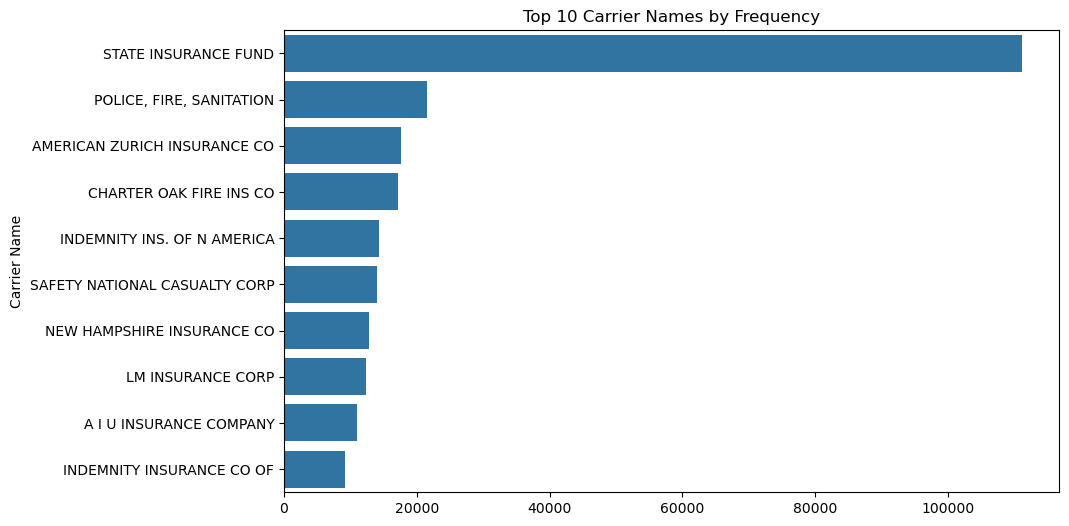

In [17]:
plt.figure(figsize=(10, 6))
carrier_counts = train_data['Carrier Name'].value_counts().head(10)  # Top 10 carriers
sns.barplot(x=carrier_counts.values, y=carrier_counts.index)
plt.title('Top 10 Carrier Names by Frequency')
plt.show()

574026
Top 10 Carrier Names and their Percentages:
STATE INSURANCE FUND: 19.36%
POLICE, FIRE, SANITATION: 3.76%
AMERICAN ZURICH INSURANCE CO: 3.06%
CHARTER OAK FIRE INS CO: 2.99%
INDEMNITY INS. OF N AMERICA: 2.50%
SAFETY NATIONAL CASUALTY CORP: 2.43%
NEW HAMPSHIRE INSURANCE CO: 2.22%
LM INSURANCE CORP: 2.14%
A I U INSURANCE COMPANY: 1.92%
INDEMNITY INSURANCE CO OF: 1.59%


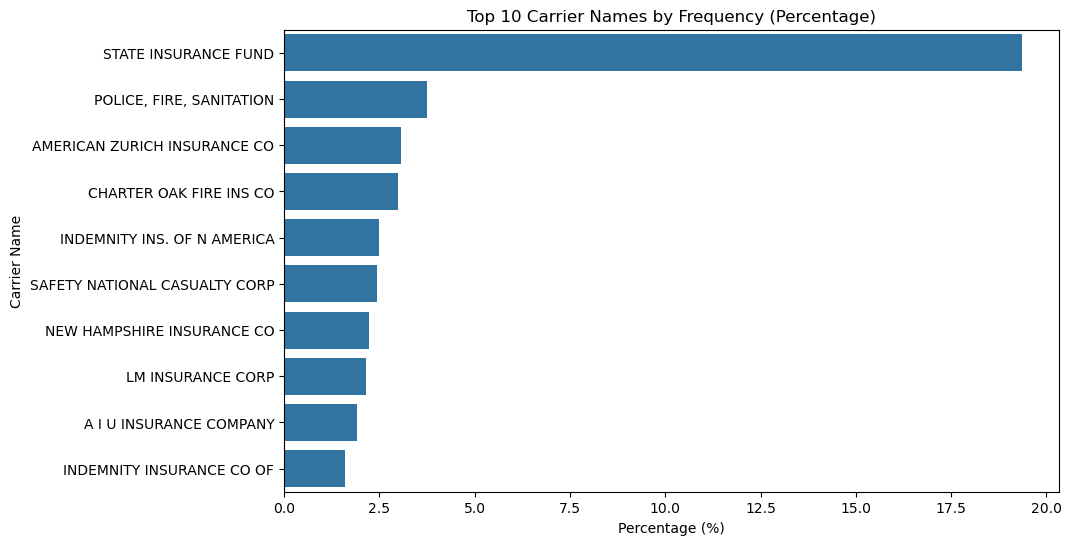


Total Percentage of Top 10 Carriers: 41.97%


In [18]:
# Calculate percentages
total_count = train_data['Carrier Name'].value_counts().sum()
print(total_count)
carrier_percentages = (carrier_counts / total_count) * 100

# Print the percentage for each top carrier
print("Top 10 Carrier Names and their Percentages:")
for carrier, percentage in zip(carrier_counts.index, carrier_percentages):
    print(f"{carrier}: {percentage:.2f}%")

# See how much the top 1- Carrier Names represents
total_percentage = carrier_percentages.sum()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=carrier_percentages.values, y=carrier_percentages.index)
plt.title('Top 10 Carrier Names by Frequency (Percentage)')
plt.xlabel('Percentage (%)')
plt.ylabel('Carrier Name')
plt.show()

print(f"\nTotal Percentage of Top 10 Carriers: {total_percentage:.2f}%")

### Top 10 Carriers represents 41.97% of all carriers 

## <b>Multivariate Analysis <br>Carrier Type x Carrier Name
### <b>Try to see if some Carriers are more associated with specific categories

In [19]:
pd.crosstab(train_data['Carrier Name'], train_data['Carrier Type'])

Carrier Type,1A. PRIVATE,2A. SIF,3A. SELF PUBLIC,4A. SELF PRIVATE,5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A),5C. SPECIAL FUND - POI CARRIER WCB MENANDS,5D. SPECIAL FUND - UNKNOWN,UNKNOWN
Carrier Name,,,,,,,,
*** CARRIER UNDETERMINED ***,0,0,0,0,0,0,0,1774
A I U INSURANCE COMPANY,11038,0,0,0,0,0,0,0
"ABF FREIGHT SYSTEM, INC.",0,0,0,128,0,0,0,0
ABF FREIGHT SYSTEMS INC DEL,0,0,0,10,0,0,0,0
ACADIA INSURANCE COMPANY,87,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
"YORKTOWN, TOWN OF",0,0,21,0,0,0,0,0
ZENITH INSURANCE COMPANY,67,0,0,0,0,0,0,0
ZURICH AMERICAN INSURANCE,41,0,0,0,0,0,0,0


` From this Cross tabulation we can't get nothing concrete, since we have 2046 rows(Carrier names), but from what we see in the first lines we can see that the Carrier name(companies) are correlated with the types, all the Carrier names being related with only one type. `

In [20]:
# First, group by 'Carrier Name' and get the number of unique 'Carrier Type' for each 'Carrier Name'
carrier_type_counts = train_data.groupby('Carrier Name')['Carrier Type'].nunique()

# Filter to check if any 'Carrier Name' is associated with more than one 'Carrier Type'
multiple_carrier_types = carrier_type_counts[carrier_type_counts > 1]
print(multiple_carrier_types)
# Check if any 'Carrier Names' have more than one 'Carrier Type'
if multiple_carrier_types.empty:
    print("Each Carrier Name is only associated with one Carrier Type.")
else:
    print("Carrier Names associated with more than one Carrier Type:")
    
    # Iterate over each carrier name and show the associated carrier types
    for carrier_name in multiple_carrier_types.index:
        carrier_types = train_data[train_data['Carrier Name'] == carrier_name]['Carrier Type'].unique()
        print(f"{carrier_name}: {list(carrier_types)}")



Carrier Name
SPECIAL FUNDS SEC 25-A    2
Name: Carrier Type, dtype: int64
Carrier Names associated with more than one Carrier Type:
SPECIAL FUNDS SEC 25-A: ['5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)', '5D. SPECIAL FUND - UNKNOWN']


- ` The fact that almost every carrier name is uniquely tied to one carrier type indicates a high degree of correlation. Carrier names are not switching between types, suggesting that knowing the carrier name is highly predictive of the associated carrier type.` 
- ` Even the one exception, "SPECIAL FUNDS SEC 25-A," involves closely related types ('5A' and '5D'), which could be due to classification nuances within the same fund. `

In [21]:
carrier_name_type_crosstab = pd.crosstab(train_data['Carrier Name'], train_data['Carrier Type'])
chi2, p, dof, ex = chi2_contingency(carrier_name_type_crosstab)
cramer_v = np.sqrt(chi2 / (len(train_data) * (min(carrier_name_type_crosstab.shape) - 1)))
print(f'Cramér’s V: {cramer_v}')

Cramér’s V: 0.9596854804712858


` Cramer test indicate high correlation between Carrier name and Carrier type `
## <B> DROP Carrier name?

### Qui square don't work well because of the huge dataset and a lot of categories
### Heat map visually terrible

# <b>*Age at Injury Feature*

## ` Histogram - Analyze distribution of ages & look for outliers`
## ` BoxPlots To find outliers`
## ` Try to find some patterns on the outliers comparing them with Birth year `
## ` Pearsons Correlation Birth Year and Year at injury`
### ` Should give us a linear correlation (negative) - People are born later age at injury will decrease`
### ` Could help us to see patterns on outliers or find/explain some errors - Like age of injury 0`

In [22]:
# General Info about the feature
train_data[['Age at Injury']].info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 1 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Age at Injury  574026 non-null  float64
dtypes: float64(1)
memory usage: 4.5 MB


In [23]:
# See the number of unique values
train_data[['Age at Injury']].nunique() 

Age at Injury    108
dtype: int64

In [24]:
train_data['Age at Injury'].value_counts().head(10)

Age at Injury
31.0    14041
30.0    14022
32.0    13994
29.0    13657
51.0    13486
33.0    13480
54.0    13403
55.0    13305
53.0    13274
34.0    13218
Name: count, dtype: int64

### Histogram - Visualize the distribution of the values and detect anomalies and Outliers

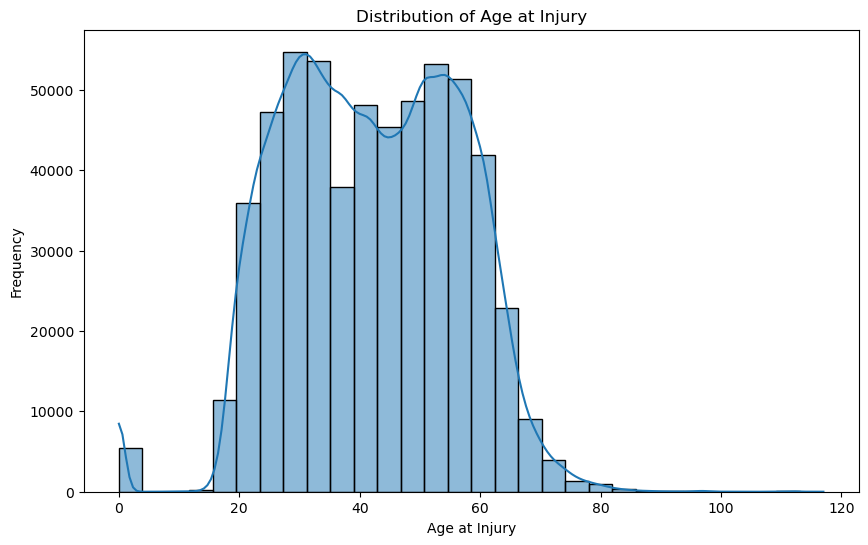

In [26]:
# Histogram for Age at Injury
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age at Injury'], bins=30, kde=True)
plt.title('Distribution of Age at Injury')
plt.xlabel('Age at Injury')
plt.ylabel('Frequency')
plt.show()

`0 is an error, so we need to discover the cause of it and deal with it,`<br>
`We ca also notice outliers in the higher end - e.g 118 years. `

25081 with 0 as birth year (NAN)

## *Birth Year Feature*

### Is this feature really important? 
### Probably gonna use it only to identify some NaNs and outliers on age at injury and drop it 

In [37]:
# General Info about the feature
train_data[['Birth Year']].info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Birth Year  544948 non-null  float64
dtypes: float64(1)
memory usage: 4.5 MB


In [105]:
train_data['Birth Year'].value_counts().head(10)


Birth Year
0.0       25081
1990.0    13180
1989.0    12867
1970.0    12527
1988.0    12463
1969.0    12353
1964.0    12279
1966.0    12249
1965.0    12168
1991.0    12144
Name: count, dtype: int64

<b> 25081 with 0 as birth year (NAN)- Same number as the Age at injury


## *Alternative Dispute Resolution Feature*

<b>Bar plot and then see relation with other variables like Carrier Type

In [38]:
train_data[['Alternative Dispute Resolution']].info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 1 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Alternative Dispute Resolution  574026 non-null  object
dtypes: object(1)
memory usage: 4.5+ MB
